In [1]:
!pip install gdown -q
!pip install sklearn -q
!pip install pandas -q
!pip install numpy -q
!pip install matplotlib -q

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!gdown 1V5B7Bt6aJm0UHbR7cRKBEK8jx7lYPVuX
!# gdown will download eeg-data.csv onto the local drive for use. Total size of
!# eeg-data.csv is 105.7 MB

Downloading...
From (original): https://drive.google.com/uc?id=1V5B7Bt6aJm0UHbR7cRKBEK8jx7lYPVuX
From (redirected): https://drive.google.com/uc?id=1V5B7Bt6aJm0UHbR7cRKBEK8jx7lYPVuX&confirm=t&uuid=9ce99d9c-5390-4aca-9821-ce1e97f02a34
To: /content/eeg-data.csv
100% 106M/106M [00:02<00:00, 45.0MB/s]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import keras
from keras import layers
import tensorflow as tf
from sklearn import preprocessing, model_selection
import random

QUALITY_THRESHOLD = 128
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = BATCH_SIZE * 2

In [4]:
eeg = pd.read_csv("eeg-data.csv")


In [5]:
unlabeled_eeg = eeg[eeg["label"] == "unlabeled"]
eeg = eeg.loc[eeg["label"] != "unlabeled"]
eeg = eeg.loc[eeg["label"] != "everyone paired"]

eeg.drop(
    [
        "indra_time",
        "Unnamed: 0",
        "browser_latency",
        "reading_time",
        "attention_esense",
        "meditation_esense",
        "updatedAt",
        "createdAt",
    ],
    axis=1,
    inplace=True,
)

eeg.reset_index(drop=True, inplace=True)
eeg.head()

,id,eeg_power,raw_values,signal_quality,label
0,7,"[56887.0, 45471.0, 20074.0, 5359.0, 22594.0, 7...","[99.0, 96.0, 91.0, 89.0, 91.0, 89.0, 87.0, 93....",0,blinkInstruction
1,5,"[11626.0, 60301.0, 5805.0, 15729.0, 4448.0, 33...","[23.0, 40.0, 64.0, 89.0, 86.0, 33.0, -14.0, -1...",0,blinkInstruction
2,1,"[15777.0, 33461.0, 21385.0, 44193.0, 11741.0, ...","[41.0, 26.0, 16.0, 20.0, 34.0, 51.0, 56.0, 55....",0,blinkInstruction
3,13,"[311822.0, 44739.0, 19000.0, 19100.0, 2650.0, ...","[208.0, 198.0, 122.0, 84.0, 161.0, 249.0, 216....",0,blinkInstruction
4,4,"[687393.0, 10289.0, 2942.0, 9874.0, 1059.0, 29...","[129.0, 133.0, 114.0, 105.0, 101.0, 109.0, 99....",0,blinkInstruction


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('eeg_power').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('raw_values').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['signal_quality']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('signal_quality', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('eeg_power')):
  _plot_series(series, series_name, i)
  fig.legend(title='eeg_power', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('signal_quality')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['signal_quality']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('signal_quality', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('raw_values')):
  _plot_series(series, series_name, i)
  fig.legend(title='raw_values', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('signal_quality')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['signal_quality']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'signal_quality'}, axis=1)
              .sort_values('signal_quality', ascending=True))
  xs = counted['signal_quality']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('signal_quality', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('eeg_power')):
  _plot_series(series, series_name, i)
  fig.legend(title='eeg_power', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('signal_quality')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['signal_quality']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'signal_quality'}, axis=1)
              .sort_values('signal_quality', ascending=True))
  xs = counted['signal_quality']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('signal_quality', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('raw_values')):
  _plot_series(series, series_name, i)
  fig.legend(title='raw_values', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('signal_quality')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['raw_values'].value_counts()
    for x_label, grp in _df_8.groupby('eeg_power')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('eeg_power')
_ = plt.ylabel('raw_values')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['eeg_power'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='id', y='eeg_power', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['raw_values'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='id', y='raw_values', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
def convert_string_data_to_values(value_string):
    str_list = json.loads(value_string)
    return str_list


eeg["raw_values"] = eeg["raw_values"].apply(convert_string_data_to_values)

eeg = eeg.loc[eeg["signal_quality"] < QUALITY_THRESHOLD]
eeg.head()

,id,eeg_power,raw_values,signal_quality,label
0,7,"[56887.0, 45471.0, 20074.0, 5359.0, 22594.0, 7...","[99.0, 96.0, 91.0, 89.0, 91.0, 89.0, 87.0, 93....",0,blinkInstruction
1,5,"[11626.0, 60301.0, 5805.0, 15729.0, 4448.0, 33...","[23.0, 40.0, 64.0, 89.0, 86.0, 33.0, -14.0, -1...",0,blinkInstruction
2,1,"[15777.0, 33461.0, 21385.0, 44193.0, 11741.0, ...","[41.0, 26.0, 16.0, 20.0, 34.0, 51.0, 56.0, 55....",0,blinkInstruction
3,13,"[311822.0, 44739.0, 19000.0, 19100.0, 2650.0, ...","[208.0, 198.0, 122.0, 84.0, 161.0, 249.0, 216....",0,blinkInstruction
4,4,"[687393.0, 10289.0, 2942.0, 9874.0, 1059.0, 29...","[129.0, 133.0, 114.0, 105.0, 101.0, 109.0, 99....",0,blinkInstruction


from matplotlib import pyplot as plt
_df_11['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('eeg_power').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['signal_quality']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('signal_quality', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('eeg_power')):
  _plot_series(series, series_name, i)
  fig.legend(title='eeg_power', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('signal_quality')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['signal_quality']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'signal_quality'}, axis=1)
              .sort_values('signal_quality', ascending=True))
  xs = counted['signal_quality']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('signal_quality', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('eeg_power')):
  _plot_series(series, series_name, i)
  fig.legend(title='eeg_power', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('signal_quality')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_15['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['eeg_power'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='id', y='eeg_power', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

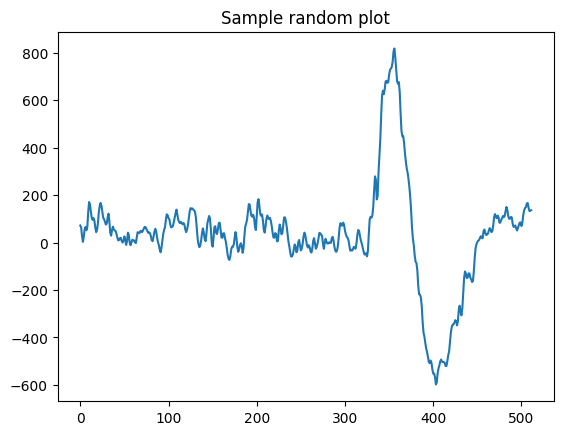

In [7]:
def view_eeg_plot(idx):
    data = eeg.loc[idx, "raw_values"]
    plt.plot(data)
    plt.title(f"Sample random plot")
    plt.show()


view_eeg_plot(7)

In [8]:
print("Before replacing labels")
print(eeg["label"].unique(), "\n")
print(len(eeg["label"].unique()), "\n")


eeg.replace(
    {
        "label": {
            "blink1": "blink",
            "blink2": "blink",
            "blink3": "blink",
            "blink4": "blink",
            "blink5": "blink",
            "math1": "math",
            "math2": "math",
            "math3": "math",
            "math4": "math",
            "math5": "math",
            "math6": "math",
            "math7": "math",
            "math8": "math",
            "math9": "math",
            "math10": "math",
            "math11": "math",
            "math12": "math",
            "thinkOfItems-ver1": "thinkOfItems",
            "thinkOfItems-ver2": "thinkOfItems",
            "video-ver1": "video",
            "video-ver2": "video",
            "thinkOfItemsInstruction-ver1": "thinkOfItemsInstruction",
            "thinkOfItemsInstruction-ver2": "thinkOfItemsInstruction",
            "colorRound1-1": "colorRound1",
            "colorRound1-2": "colorRound1",
            "colorRound1-3": "colorRound1",
            "colorRound1-4": "colorRound1",
            "colorRound1-5": "colorRound1",
            "colorRound1-6": "colorRound1",
            "colorRound2-1": "colorRound2",
            "colorRound2-2": "colorRound2",
            "colorRound2-3": "colorRound2",
            "colorRound2-4": "colorRound2",
            "colorRound2-5": "colorRound2",
            "colorRound2-6": "colorRound2",
            "colorRound3-1": "colorRound3",
            "colorRound3-2": "colorRound3",
            "colorRound3-3": "colorRound3",
            "colorRound3-4": "colorRound3",
            "colorRound3-5": "colorRound3",
            "colorRound3-6": "colorRound3",
            "colorRound4-1": "colorRound4",
            "colorRound4-2": "colorRound4",
            "colorRound4-3": "colorRound4",
            "colorRound4-4": "colorRound4",
            "colorRound4-5": "colorRound4",
            "colorRound4-6": "colorRound4",
            "colorRound5-1": "colorRound5",
            "colorRound5-2": "colorRound5",
            "colorRound5-3": "colorRound5",
            "colorRound5-4": "colorRound5",
            "colorRound5-5": "colorRound5",
            "colorRound5-6": "colorRound5",
            "colorInstruction1": "colorInstruction",
            "colorInstruction2": "colorInstruction",
            "readyRound1": "readyRound",
            "readyRound2": "readyRound",
            "readyRound3": "readyRound",
            "readyRound4": "readyRound",
            "readyRound5": "readyRound",
            "colorRound1": "colorRound",
            "colorRound2": "colorRound",
            "colorRound3": "colorRound",
            "colorRound4": "colorRound",
            "colorRound5": "colorRound",
        }
    },
    inplace=True,
)

print("After replacing labels")
print(eeg["label"].unique())
print(len(eeg["label"].unique()))

le = preprocessing.LabelEncoder()  # Generates a look-up table
le.fit(eeg["label"])
eeg["label"] = le.transform(eeg["label"])

Before replacing labels
['blinkInstruction' 'blink1' 'blink2' 'blink3' 'blink4' 'blink5'
 'relaxInstruction' 'relax' 'mathInstruction' 'math1' 'math2' 'math3'
 'math4' 'math5' 'math6' 'math7' 'math8' 'math9' 'math10' 'math11'
 'math12' 'musicInstruction' 'music' 'videoInstruction' 'video-ver1'
 'thinkOfItemsInstruction-ver1' 'thinkOfItems-ver1' 'colorInstruction1'
 'colorInstruction2' 'readyRound1' 'colorRound1-1' 'colorRound1-2'
 'colorRound1-3' 'colorRound1-4' 'colorRound1-5' 'colorRound1-6'
 'readyRound2' 'colorRound2-1' 'colorRound2-2' 'colorRound2-3'
 'colorRound2-4' 'colorRound2-5' 'colorRound2-6' 'readyRound3'
 'colorRound3-1' 'colorRound3-2' 'colorRound3-3' 'colorRound3-4'
 'colorRound3-5' 'colorRound3-6' 'readyRound4' 'colorRound4-1'
 'colorRound4-2' 'colorRound4-3' 'colorRound4-4' 'colorRound4-5'
 'colorRound4-6' 'readyRound5' 'colorRound5-1' 'colorRound5-2'
 'colorRound5-3' 'colorRound5-4' 'colorRound5-5' 'colorRound5-6'
 'video-ver2' 'thinkOfItemsInstruction-ver2' 'thinkOfI

In [9]:
num_classes = len(eeg["label"].unique())
print(num_classes)

19


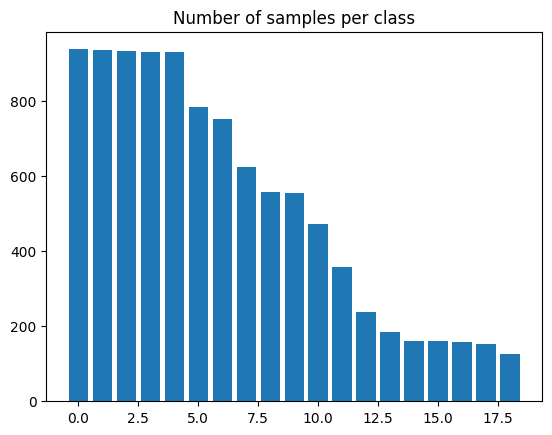

In [10]:
plt.bar(range(num_classes), eeg["label"].value_counts())
plt.title("Number of samples per class")
plt.show()

In [11]:
scaler = preprocessing.MinMaxScaler()
series_list = [
    scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in eeg["raw_values"]
]

labels_list = [i for i in eeg["label"]]

In [12]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    series_list, labels_list, test_size=0.15, random_state=42, shuffle=True
)

print(
    f"Length of x_train : {len(x_train)}\nLength of x_test : {len(x_test)}\nLength of y_train : {len(y_train)}\nLength of y_test : {len(y_test)}"
)

x_train = np.asarray(x_train).astype(np.float32).reshape(-1, 512, 1)
y_train = np.asarray(y_train).astype(np.float32).reshape(-1, 1)
y_train = keras.utils.to_categorical(y_train)

x_test = np.asarray(x_test).astype(np.float32).reshape(-1, 512, 1)
y_test = np.asarray(y_test).astype(np.float32).reshape(-1, 1)
y_test = keras.utils.to_categorical(y_test)

Length of x_train : 8460
Length of x_test : 1494
Length of y_train : 8460
Length of y_test : 1494


In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [14]:
vals_dict = {}
for i in eeg["label"]:
    if i in vals_dict.keys():
        vals_dict[i] += 1
    else:
        vals_dict[i] = 1
total = sum(vals_dict.values())

# Formula used - Naive method where
# weight = 1 - (no. of samples present / total no. of samples)
# So more the samples, lower the weight

weight_dict = {k: (1 - (v / total)) for k, v in vals_dict.items()}
print(weight_dict)

{1: 0.9872413100261201, 0: 0.975989551938919, 14: 0.9841269841269842, 13: 0.9061683745228049, 9: 0.9838255977496484, 8: 0.9059674502712477, 11: 0.9847297568816556, 10: 0.9063692987743621, 18: 0.9838255977496484, 17: 0.9057665260196905, 16: 0.9373116335141651, 15: 0.9065702230259193, 2: 0.9211372312638135, 12: 0.9525818766325096, 3: 0.9245529435402853, 4: 0.943841671689773, 5: 0.9641350210970464, 6: 0.981514968856741, 7: 0.9443439823186659}


In [15]:
def plot_history_metrics(history: keras.callbacks.History):
    total_plots = len(history.history)
    cols = total_plots // 2

    rows = total_plots // cols

    if total_plots % cols != 0:
        rows += 1

    pos = range(1, total_plots + 1)
    plt.figure(figsize=(15, 10))
    for i, (key, value) in enumerate(history.history.items()):
        plt.subplot(rows, cols, pos[i])
        plt.plot(range(len(value)), value)
        plt.title(str(key))
    plt.show()

In [16]:
def create_model():
    input_layer = keras.Input(shape=(512, 1))

    x = layers.Conv1D(
        filters=32, kernel_size=3, strides=2, activation="relu", padding="same"
    )(input_layer)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=64, kernel_size=3, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=128, kernel_size=5, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=256, kernel_size=5, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=512, kernel_size=7, strides=2, activation="relu", padding="same"
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv1D(
        filters=1024,
        kernel_size=7,
        strides=2,
        activation="relu",
        padding="same",
    )(x)
    x = layers.BatchNormalization()(x)

    x = layers.Dropout(0.2)(x)

    x = layers.Flatten()(x)

    x = layers.Dense(4096, activation="relu")(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(
        2048, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Dense(
        1024, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(
        128, activation="relu", kernel_regularizer=keras.regularizers.L2()
    )(x)
    output_layer = layers.Dense(num_classes, activation="softmax")(x)

    return keras.Model(inputs=input_layer, outputs=output_layer)

In [17]:
conv_model = create_model()
conv_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 512, 1)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 256, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 128, 64)             │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 64, 128)             │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 32, 256)             │         164,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 256)             │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 16, 512)             │         918,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 512)             │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 8, 1024)             │       3,671,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 1024)             │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      33,558,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2048)                │       8,390,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 48,989,651 (186.88 MB)

 Trainable params: 48,985,619 (186.87 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [18]:
epochs = 30

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_top_k_categorical_accuracy",
        factor=0.2,
        patience=2,
        min_lr=0.000001,
    ),
]

optimizer = keras.optimizers.Adam(amsgrad=True, learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy()

In [19]:
conv_model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[
        keras.metrics.TopKCategoricalAccuracy(k=3),
        keras.metrics.AUC(),
        keras.metrics.Precision(),
        keras.metrics.Recall(),
    ],
)

conv_model_history = conv_model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=test_dataset,
    class_weight=weight_dict,
)

Epoch 1/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 60s 318ms/step - auc: 0.6139 - loss: 25.8855 - precision: 0.0720 - recall: 0.0057 - top_k_categorical_accuracy: 0.2532 - val_auc: 0.6337 - val_loss: 4.5867 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_top_k_categorical_accuracy: 0.2610 - learning_rate: 0.0010
Epoch 2/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 40s 84ms/step - auc: 0.6953 - loss: 3.8113 - precision: 0.1163 - recall: 1.1260e-04 - top_k_categorical_accuracy: 0.3107 - val_auc: 0.6058 - val_loss: 3.4254 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_top_k_categorical_accuracy: 0.2209 - learning_rate: 0.0010
Epoch 3/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 28s 140ms/step - auc: 0.7138 - loss: 2.9412 - precision: 0.2007 - recall: 2.3362e-04 - top_k_categorical_accuracy: 0.3278 - val_auc: 0.6163 - val_loss: 3.2576 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_top_k_categorical_accuracy: 0.2450 - learning_rate: 0.0010
Epoch 4/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/ste

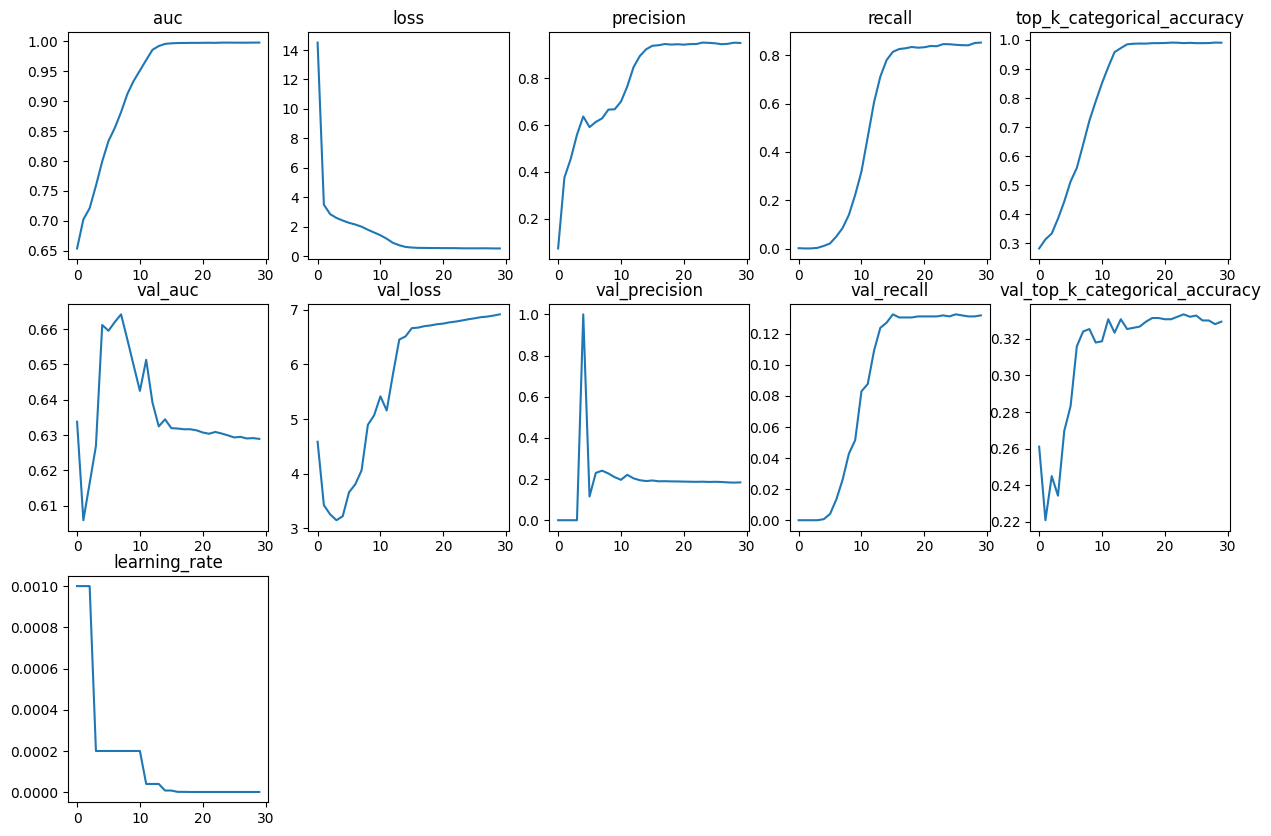

In [20]:
plot_history_metrics(conv_model_history)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - auc: 0.6354 - loss: 6.7853 - precision: 0.1844 - recall: 0.1291 - top_k_categorical_accuracy: 0.3437
Loss : 6.915798664093018
Top 3 Categorical Accuracy : 0.32931727170944214
Area under the Curve (ROC) : 0.6288893818855286
Precision : 0.18376865983009338
Recall : 0.13186077773571014


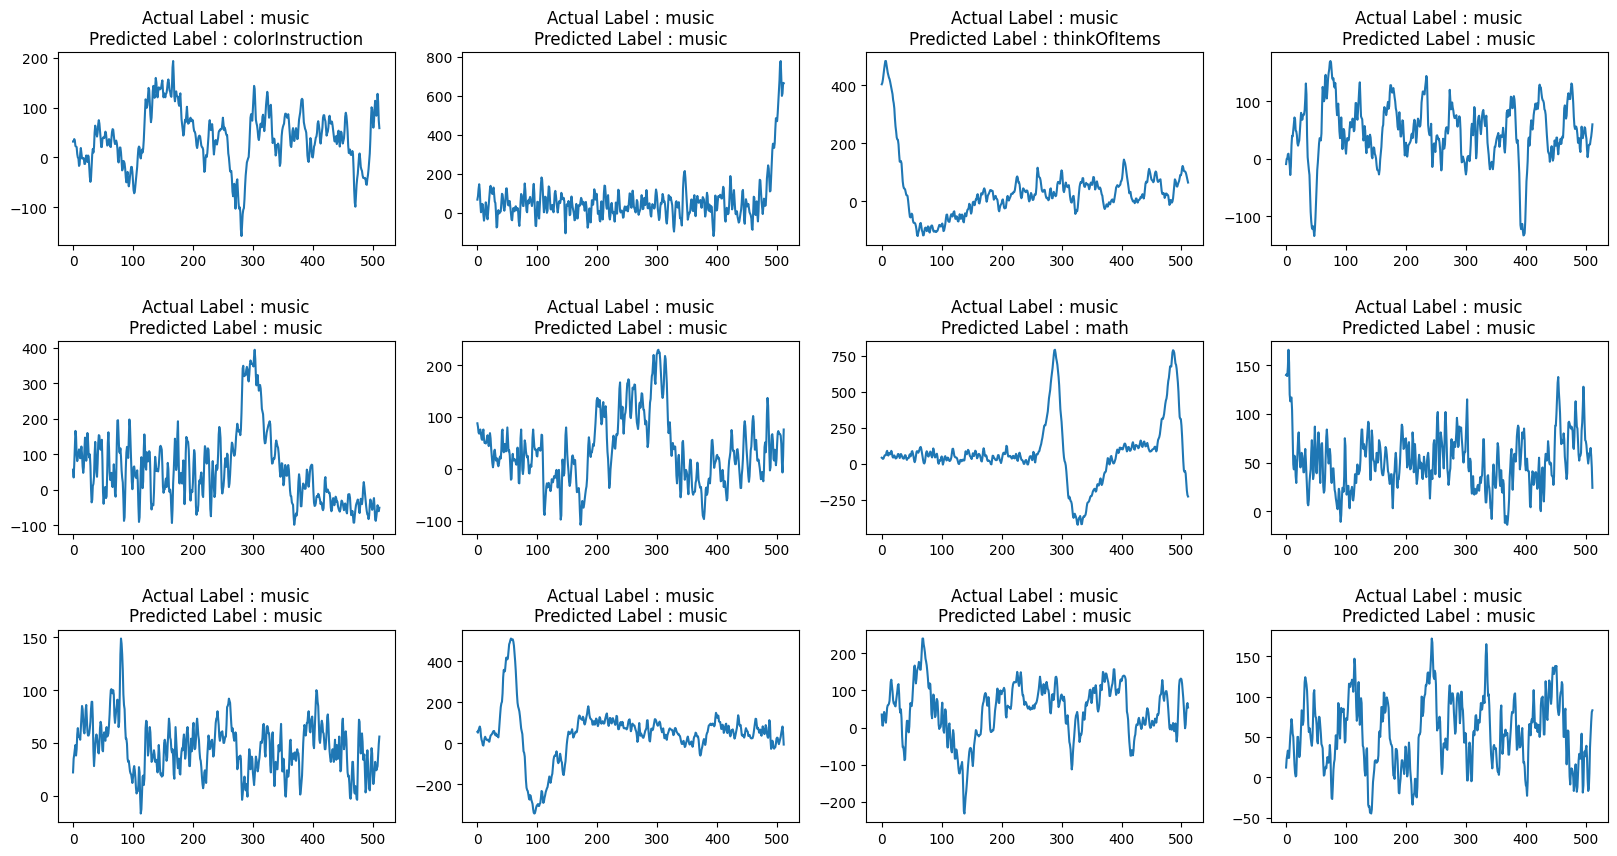

In [21]:
loss, accuracy, auc, precision, recall = conv_model.evaluate(test_dataset)
print(f"Loss : {loss}")
print(f"Top 3 Categorical Accuracy : {accuracy}")
print(f"Area under the Curve (ROC) : {auc}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")


def view_evaluated_eeg_plots(model):
    start_index = random.randint(10, len(eeg))
    end_index = start_index + 11
    data = eeg.loc[start_index:end_index, "raw_values"]
    data_array = [scaler.fit_transform(np.asarray(i).reshape(-1, 1)) for i in data]
    data_array = [np.asarray(data_array).astype(np.float32).reshape(-1, 512, 1)]
    original_labels = eeg.loc[start_index:end_index, "label"]
    predicted_labels = np.argmax(model.predict(data_array, verbose=0), axis=1)
    original_labels = [
        le.inverse_transform(np.array(label).reshape(-1))[0]
        for label in original_labels
    ]
    predicted_labels = [
        le.inverse_transform(np.array(label).reshape(-1))[0]
        for label in predicted_labels
    ]
    total_plots = 12
    cols = total_plots // 3
    rows = total_plots // cols
    if total_plots % cols != 0:
        rows += 1
    pos = range(1, total_plots + 1)
    fig = plt.figure(figsize=(20, 10))
    for i, (plot_data, og_label, pred_label) in enumerate(
        zip(data, original_labels, predicted_labels)
    ):
        plt.subplot(rows, cols, pos[i])
        plt.plot(plot_data)
        plt.title(f"Actual Label : {og_label}\nPredicted Label : {pred_label}")
        fig.subplots_adjust(hspace=0.5)
    plt.show()


view_evaluated_eeg_plots(conv_model)